In [16]:
import os
import pandas as pd
import preprocessing as pp
from sklearn.preprocessing import StandardScaler
# import Sequential from keras
from keras.models import Sequential
# import Dense, Dropout
from keras.layers import Dense, Dropout
# classification_report
from sklearn.metrics import classification_report
# confusion_matrix
from sklearn.metrics import confusion_matrix

# import joblib
import joblib

In [17]:
# Path
cwd = os.getcwd()
csv_path = os.path.join(cwd, 'datasets/csv/')
train_file = 'word2vec_train.csv'
test_file = 'word2vec_test.csv'

In [18]:
train_dataset = pd.read_csv(os.path.join(csv_path, train_file), index_col=0)
test_dataset = pd.read_csv(os.path.join(csv_path, test_file), index_col=0)

In [19]:
train_dataset.head()

,label,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,-0.243125,-0.253478,-0.005901,-0.076038,0.031763,-0.035917,-0.073341,0.577681,-0.029940,...,-0.267438,-0.105795,-0.094777,0.053563,-0.431388,-0.062541,-0.121670,-0.055277,0.316470,-0.118448
1,0,-0.128491,-0.087448,0.010220,-0.070209,0.056440,0.013893,-0.057083,0.294077,-0.057198,...,-0.100806,-0.010143,0.073192,0.039565,-0.348876,0.058328,-0.012493,0.059502,0.185431,-0.054062
2,1,-0.137854,-0.154933,-0.000142,0.000980,0.029971,-0.066496,0.172730,0.261095,-0.091565,...,-0.326195,-0.069702,0.230789,0.062554,-0.380453,0.158121,-0.121220,0.012845,0.202206,-0.174568
3,0,-0.188086,-0.339599,0.001944,-0.067542,0.032086,0.170307,0.034120,0.338939,0.068139,...,-0.230627,-0.086075,-0.067766,0.145196,-0.424615,0.099050,0.045489,-0.009281,0.206298,-0.176881
4,0,-0.020927,-0.083643,-0.014417,-0.121288,0.060500,0.018497,0.029439,0.286098,-0.150380,...,-0.066439,0.015471,0.123407,-0.028162,-0.353352,0.194933,-0.039465,-0.034747,0.209495,-0.043877


In [20]:
train_dataset_dict = pp.separate_features_target(train_dataset, 1, 'label')
test_dataset_dict = pp.separate_features_target(test_dataset, 1, 'label')
X_train = train_dataset_dict['features']
y_train = train_dataset_dict['target']
X_test = test_dataset_dict['features']
y_test = test_dataset_dict['target']

In [21]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.243125,-0.253478,-0.005901,-0.076038,0.031763,-0.035917,-0.073341,0.577681,-0.029940,0.030174,...,-0.267438,-0.105795,-0.094777,0.053563,-0.431388,-0.062541,-0.121670,-0.055277,0.316470,-0.118448
1,-0.128491,-0.087448,0.010220,-0.070209,0.056440,0.013893,-0.057083,0.294077,-0.057198,0.187377,...,-0.100806,-0.010143,0.073192,0.039565,-0.348876,0.058328,-0.012493,0.059502,0.185431,-0.054062
2,-0.137854,-0.154933,-0.000142,0.000980,0.029971,-0.066496,0.172730,0.261095,-0.091565,-0.056001,...,-0.326195,-0.069702,0.230789,0.062554,-0.380453,0.158121,-0.121220,0.012845,0.202206,-0.174568
3,-0.188086,-0.339599,0.001944,-0.067542,0.032086,0.170307,0.034120,0.338939,0.068139,0.034965,...,-0.230627,-0.086075,-0.067766,0.145196,-0.424615,0.099050,0.045489,-0.009281,0.206298,-0.176881
4,-0.020927,-0.083643,-0.014417,-0.121288,0.060500,0.018497,0.029439,0.286098,-0.150380,0.112154,...,-0.066439,0.015471,0.123407,-0.028162,-0.353352,0.194933,-0.039465,-0.034747,0.209495,-0.043877


In [22]:
# scaler = StandardScaler()
# X_train_standard = scaler.fit_transform(X_train)
# X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)
# X_train_standard.head()

In [23]:
# Khởi tạo mô hình
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Hiển thị cấu trúc mô hình
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               25728     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [25]:
# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=40,  
    batch_size=64,  
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/40
113/113 [==============================] - 6s 12ms/step - loss: 0.3370 - accuracy: 0.8584 - val_loss: 0.1495 - val_accuracy: 0.9350
Epoch 2/40
113/113 [==============================] - 1s 8ms/step - loss: 0.1535 - accuracy: 0.9458 - val_loss: 0.1434 - val_accuracy: 0.9439
Epoch 3/40
113/113 [==============================] - 1s 11ms/step - loss: 0.1427 - accuracy: 0.9514 - val_loss: 0.1181 - val_accuracy: 0.9544
Epoch 4/40
113/113 [==============================] - 1s 6ms/step - loss: 0.1298 - accuracy: 0.9537 - val_loss: 0.1125 - val_accuracy: 0.9556
Epoch 5/40
113/113 [==============================] - 1s 6ms/step - loss: 0.1256 - accuracy: 0.9598 - val_loss: 0.1085 - val_accuracy: 0.9583
Epoch 6/40
113/113 [==============================] - 1s 7ms/step - loss: 0.1163 - accuracy: 0.9604 - val_loss: 0.1089 - val_accuracy: 0.9606
Epoch 7/40
113/113 [==============================] - 1s 8ms/step - loss: 0.1142 - accuracy: 0.9616 - val_loss: 0.1014 - val_accuracy: 0.9628
Epoc

In [26]:
# Đánh giá trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Dự đoán và in báo cáo chi tiết
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.96
Test Loss: 0.11
71/71 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1276
           1       0.96      0.96      0.96       974

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250

Confusion Matrix:
[[1234   42]
 [  39  935]]


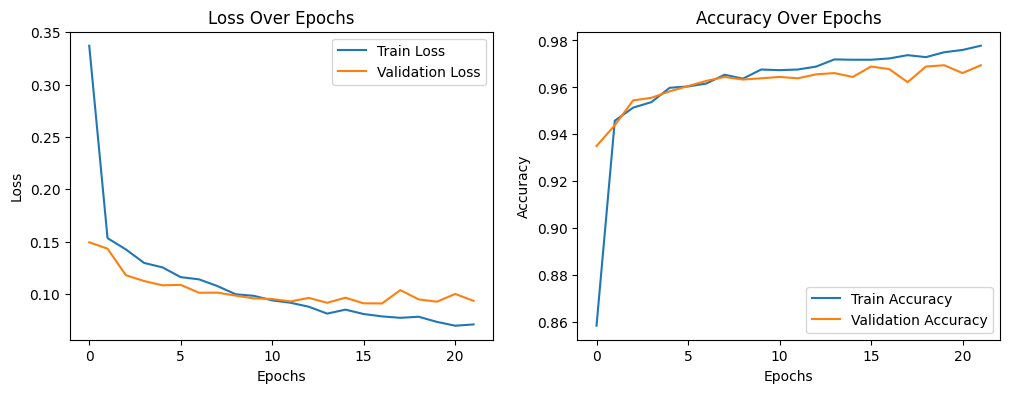

In [27]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [28]:
joblib.dump(model, 'DNN_model.pkl')

['DNN_model.pkl']

In [29]:
print(X_test.loc[30].values.reshape(1, -1))
print(y_test.loc[30])

[[-7.50773251e-02 -7.15747252e-02 -7.28948116e-02 -2.38427177e-01
   1.18578725e-01 -9.52715129e-02  2.76820455e-02  2.54856616e-01
  -1.28886178e-01  9.09540579e-02  1.90813810e-01 -4.53597531e-02
   1.46296173e-01  1.67903349e-01 -1.00983158e-02  1.22308463e-01
  -1.56469986e-01 -1.26242340e-01 -9.11990702e-02 -2.02691987e-01
   4.18282859e-02 -3.79022546e-02 -1.25125557e-01 -8.10109749e-02
   4.97204512e-02 -8.51985812e-02  1.18980788e-01  5.19905090e-02
   1.71445534e-01  1.92825031e-02  2.15503931e-01 -1.76744193e-01
  -2.47923821e-01  5.25697246e-02 -1.62906557e-01  9.45818201e-02
  -1.14338405e-01 -9.06523988e-02 -8.20083320e-02 -2.16739520e-01
  -8.30562115e-02  3.18569392e-02 -9.23225656e-02  1.10218652e-01
  -3.14824618e-02  5.51743098e-02 -2.22792044e-01 -2.60967076e-01
   1.90592676e-01  3.70517671e-02 -1.76796675e-01 -6.97019417e-03
  -1.50406465e-03  4.37464975e-02 -9.58498418e-02 -9.94786993e-02
  -6.52578175e-02 -1.70878351e-01  1.97143316e-01  1.95628867e-01
  -1.93040

In [30]:
predict = model.predict(X_test.loc[30].values.reshape(1, -1))
print(predict)

1/1 [==============================] - 0s 100ms/step
[[0.00057987]]
